In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cusersmarildownloadswinecsv/wine.csv


In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
import preprocessing 

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

# Information About Data

In [3]:
dataset = pandas.read_csv('/kaggle/input/cusersmarildownloadswinecsv/wine.csv',  delimiter=';')
dataset.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.5              0.33         0.32            11.1      0.036   
1            6.3              0.27         0.29            12.2      0.044   
2            7.0              0.30         0.51            13.6      0.050   
3            7.4              0.38         0.27             7.5      0.041   
4            8.1              0.12         0.38             0.9      0.034   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 25.0                 119.0  0.99620  3.15       0.34   
1                 59.0                 196.0  0.99782  3.14       0.40   
2                 40.0                 168.0  0.99760  3.07       0.52   
3                 24.0                 160.0  0.99535  3.17       0.43   
4                 36.0                  86.0  0.99026  2.80       0.55   

  alcohol  quality  
0    10.5        6  
1     8.8        6  
2     9.6        7  
3      10        5  
4      12        6

In [4]:
dataset.tail()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
2032            8.1              0.34         0.28             7.5      0.040   
2033            7.4              0.19         0.31            14.5      0.045   
2034            6.7              0.36         0.26             7.9      0.034   
2035            7.7              0.28         0.35            15.3      0.056   
2036            5.7              0.22         0.28             1.3      0.027   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
2032                 70.0                 230.0  0.99558  3.14       0.55   
2033                 39.0                 193.0  0.99860  3.10       0.50   
2034                 39.0                 123.0  0.99119  2.99       0.30   
2035                 31.0                 117.0  0.99980  3.27       0.50   
2036                 26.0                 101.0  0.98948  3.35       0.38   

     alcohol  quality  
2032     9.8        6  
2033     9.2        6  
2034    12.2        7  
2035     9.6        5  
2036    12.5        7

When we look at the information of data, we can see that 'alcohol' attribute is object. We can use this attribute with ML algorithms, so we have to change this value to numerical value.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         2037 non-null   float64
 1   volatile_acidity      2037 non-null   float64
 2   citric_acid           2037 non-null   float64
 3   residual_sugar        2037 non-null   float64
 4   chlorides             2037 non-null   float64
 5   free_sulfur_dioxide   2037 non-null   float64
 6   total_sulfur_dioxide  2037 non-null   float64
 7   density               2037 non-null   float64
 8   pH                    2037 non-null   float64
 9   sulphates             2037 non-null   float64
 10  alcohol               2037 non-null   object 
 11  quality               2037 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 191.1+ KB


In this code snippet, I converted alcohol values to numeric values.

In [6]:
dataset['alcohol'] = pd.to_numeric(dataset['alcohol'],errors='coerce')

Checking data types again.. And done.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         2037 non-null   float64
 1   volatile_acidity      2037 non-null   float64
 2   citric_acid           2037 non-null   float64
 3   residual_sugar        2037 non-null   float64
 4   chlorides             2037 non-null   float64
 5   free_sulfur_dioxide   2037 non-null   float64
 6   total_sulfur_dioxide  2037 non-null   float64
 7   density               2037 non-null   float64
 8   pH                    2037 non-null   float64
 9   sulphates             2037 non-null   float64
 10  alcohol               2020 non-null   float64
 11  quality               2037 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 191.1 KB


Checking sum values in the 'alcohol' column. We have 17 missing values in that column.

In [8]:
dataset['alcohol'].isnull().sum()

17

For this dataset, it would be correct to replace the blank values with mean.

In [9]:
dataset['alcohol'].fillna(dataset['alcohol'].mean(), inplace = True)

Checking 'alcohol' column again.. And done.

In [10]:
dataset['alcohol'].isnull().sum()

0

Some statistical information about dataset.

In [11]:
dataset.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    2037.000000       2037.000000  2037.000000     2037.000000   
mean        6.825626          0.266568     0.323201        6.277590   
std         0.753302          0.076738     0.094378        4.867284   
min         4.400000          0.080000     0.000000        0.700000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.310000        5.300000   
75%         7.300000          0.310000     0.380000        9.400000   
max         8.800000          0.485000     0.570000       20.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  2037.000000          2037.000000           2037.000000  2037.000000   
mean      0.042211            34.718949            136.945508     1.586169   
std       0.009973            15.215444             41.424123     7.292762   
min       0.012000             3.000000             21.000000     0.987110   
25%       0.035000            24.000000            107.000000     0.991520   
50%       0.042000            34.000000            133.000000     0.993500   
75%       0.049000            45.000000            166.000000     0.995800   
max       0.071000            78.000000            253.000000   100.196000   

                pH    sulphates      alcohol      quality  
count  2037.000000  2037.000000  2037.000000  2037.000000  
mean      3.186348     0.481055    10.596371     5.929799  
std       0.138701     0.098560     1.219822     0.845931  
min       2.790000     0.220000     8.400000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.500000     6.000000  
75%       3.280000     0.540000    11.400000     6.000000  
max       3.560000     0.760000    14.200000     9.000000

Last check..

In [12]:
dataset.isnull().sum().sum()

0

And we are ready to go!

# Pandas Profiling

Pandas profiling is a library that generates interactive reports with our data, we can see the distribution of the data, the types of data, possible problems it might have. It is very easy to use, with only 3 lines we can generate a report that we can send to anyone and that can be used even if you do not know programming. source : https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e

I used pandas_profiling to see details about data. I think this library is useful for see details about all features. All features are examined seperately and report has some visual graphs.

In [13]:
from pandas_profiling import ProfileReport
report = ProfileReport(dataset)
report.to_file(output_file="report.html")

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation

In [14]:
list(dataset.columns)

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [15]:
features = ['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']
sns.set_style('darkgrid')

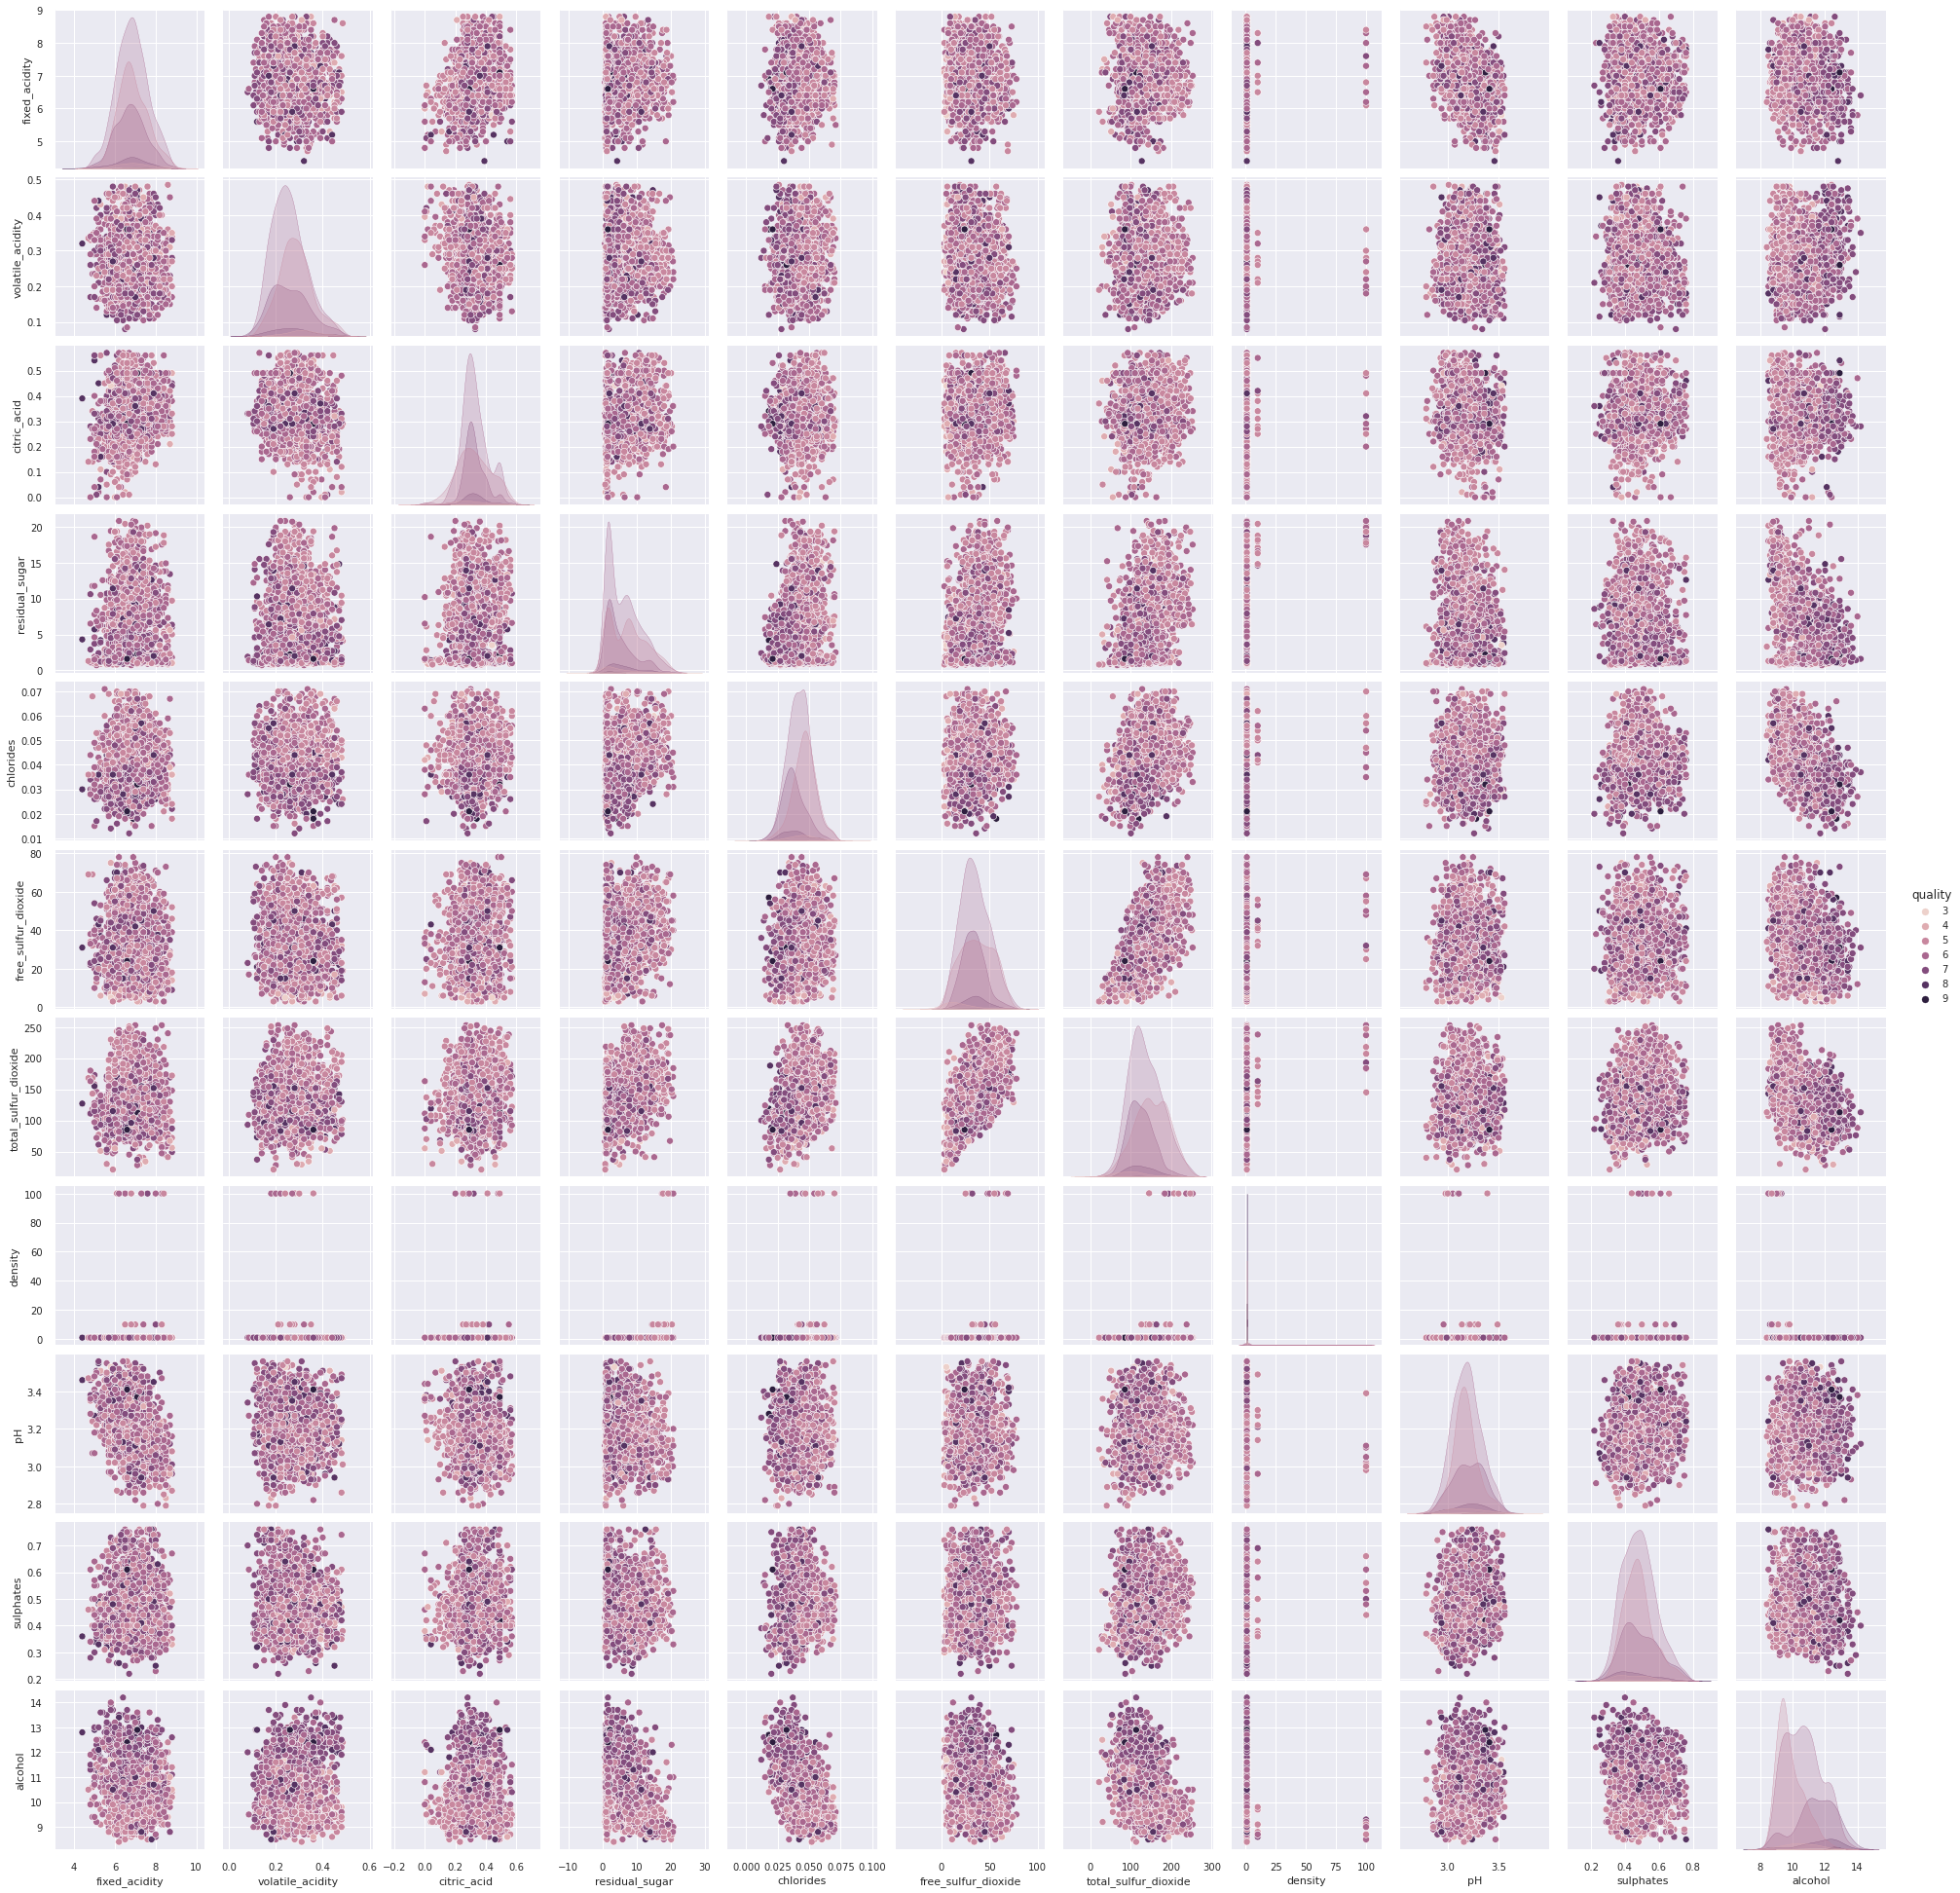

In [16]:
sns.pairplot(dataset, hue = 'quality')

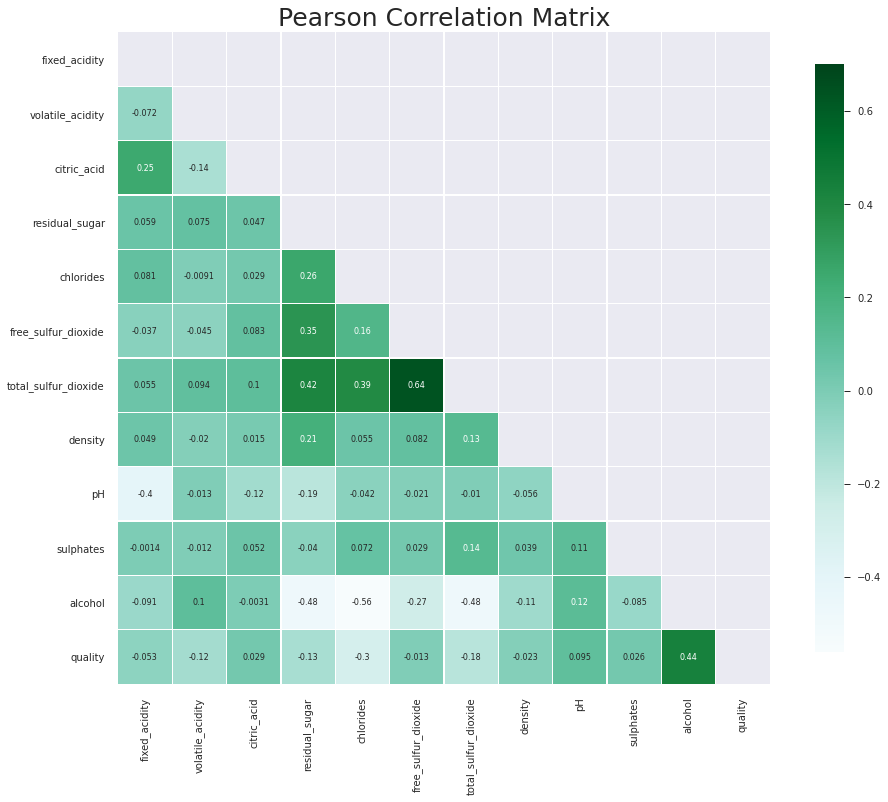

In [17]:
mask = np.zeros_like(dataset[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.set_style('darkgrid')
sns.heatmap(dataset[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

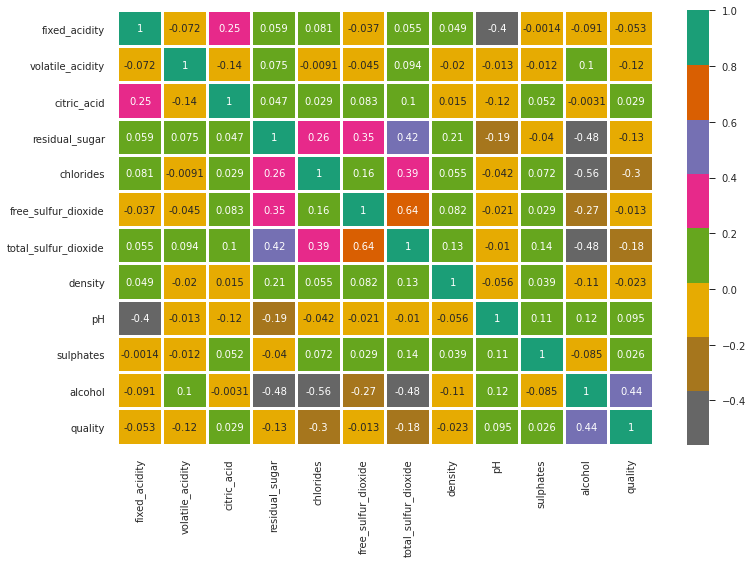

In [18]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

When we look at the correlation graphics, most remarkable value is between 'total_sulfur_dixoide' and 'free_sulfur_dioxide'. And the other one is alcohol and quality. An increase in one of these values causes an increase in the other.

# Data Visualization

Some visual tools to understand the data will be beneficial. 

<AxesSubplot:ylabel='quality'>

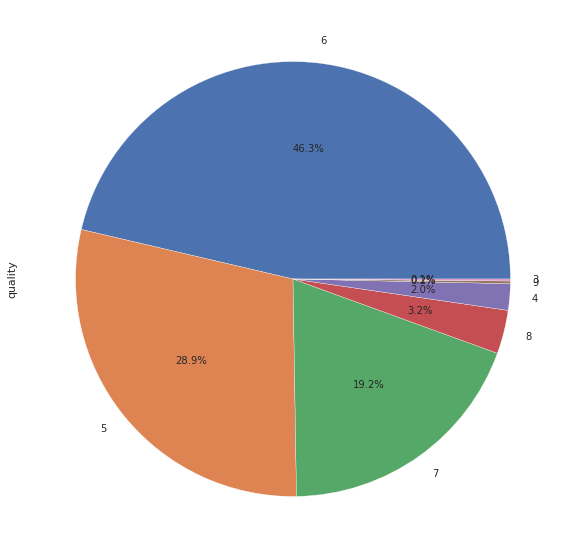

In [19]:
plt.figure(1, figsize=(10,10))
dataset['quality'].value_counts().plot.pie(autopct="%1.1f%%")

We have 7 labels. And this is the their distribution.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

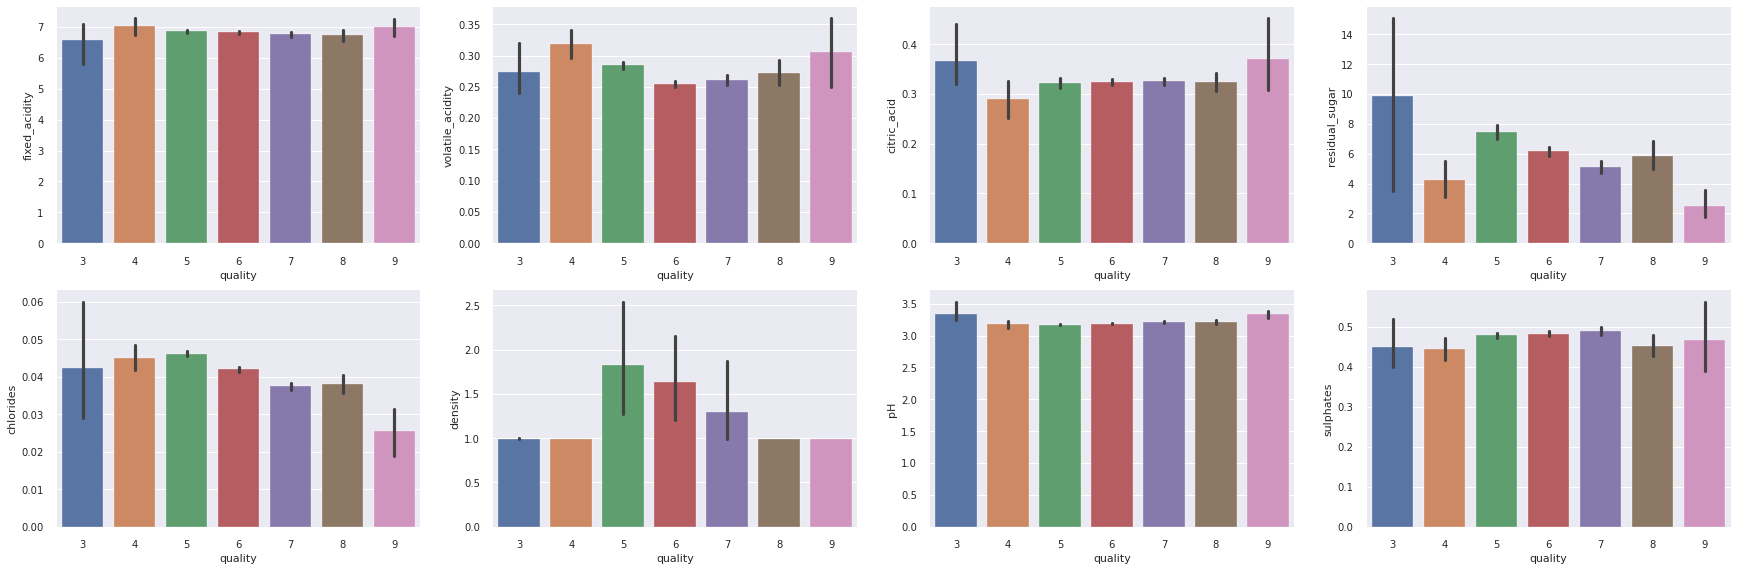

In [20]:
plt.figure(figsize=(30,20))

plt.subplot(4,4,1)
sns.barplot(x = 'quality', y = 'fixed_acidity', data = dataset)

plt.subplot(4,4,2)
sns.barplot(x = 'quality', y = 'volatile_acidity', data = dataset)

plt.subplot(4,4,3)
sns.barplot(x = 'quality', y = 'citric_acid', data = dataset)

plt.subplot(4,4,4)
sns.barplot(x = 'quality', y = 'residual_sugar', data = dataset)

plt.subplot(4,4,5)
sns.barplot(x = 'quality', y = 'chlorides', data = dataset)

plt.subplot(4,4,6)
sns.barplot(x = 'quality', y = 'density', data = dataset)

plt.subplot(4,4,7)
sns.barplot(x = 'quality', y = 'pH', data = dataset)

plt.subplot(4,4,8)
sns.barplot(x = 'quality', y = 'sulphates', data = dataset)

Text(0.5, 1.0, 'volatile_acidity Interval')

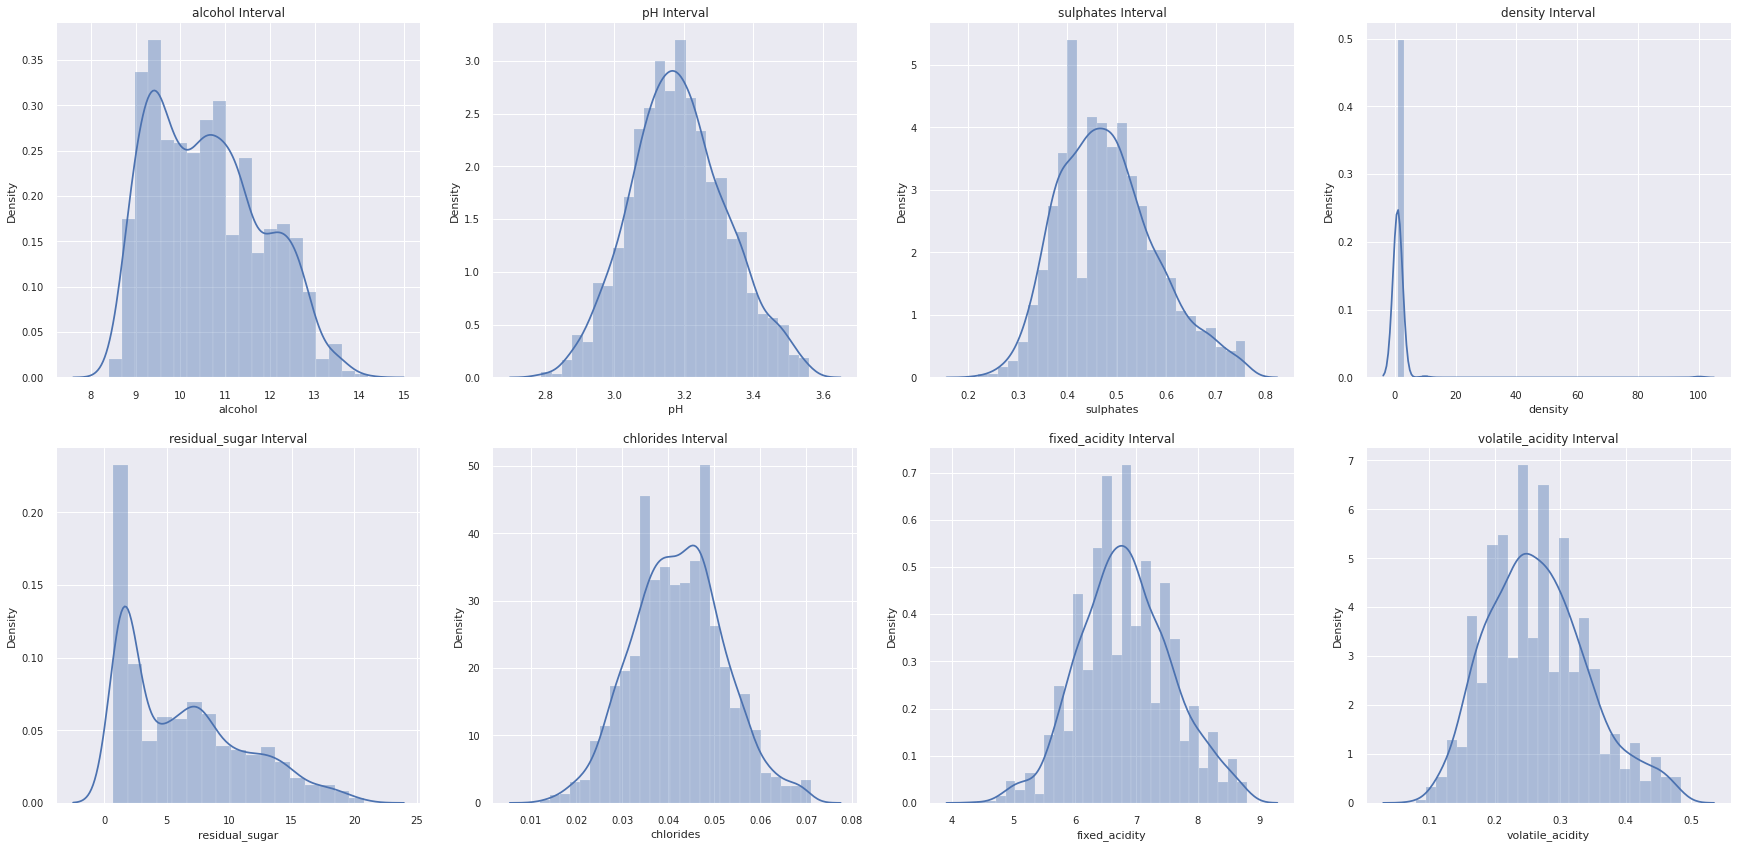

In [21]:
plt.figure(figsize=(30,30))

plt.subplot(4,4,1)
sns.distplot(dataset['alcohol']).set_title('alcohol Interval')

plt.subplot(4,4,2)
sns.distplot(dataset['pH']).set_title('pH Interval')

plt.subplot(4,4,3)
sns.distplot(dataset['sulphates']).set_title('sulphates Interval')

plt.subplot(4,4,4)
sns.distplot(dataset['density']).set_title('density Interval')

plt.subplot(4,4,5)
sns.distplot(dataset['residual_sugar']).set_title('residual_sugar Interval')

plt.subplot(4,4,6)
sns.distplot(dataset['chlorides']).set_title('chlorides Interval')

plt.subplot(4,4,7)
sns.distplot(dataset['fixed_acidity']).set_title('fixed_acidity Interval')

plt.subplot(4,4,8)
sns.distplot(dataset['volatile_acidity']).set_title('volatile_acidity Interval')

Intervals of some attributes.

<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

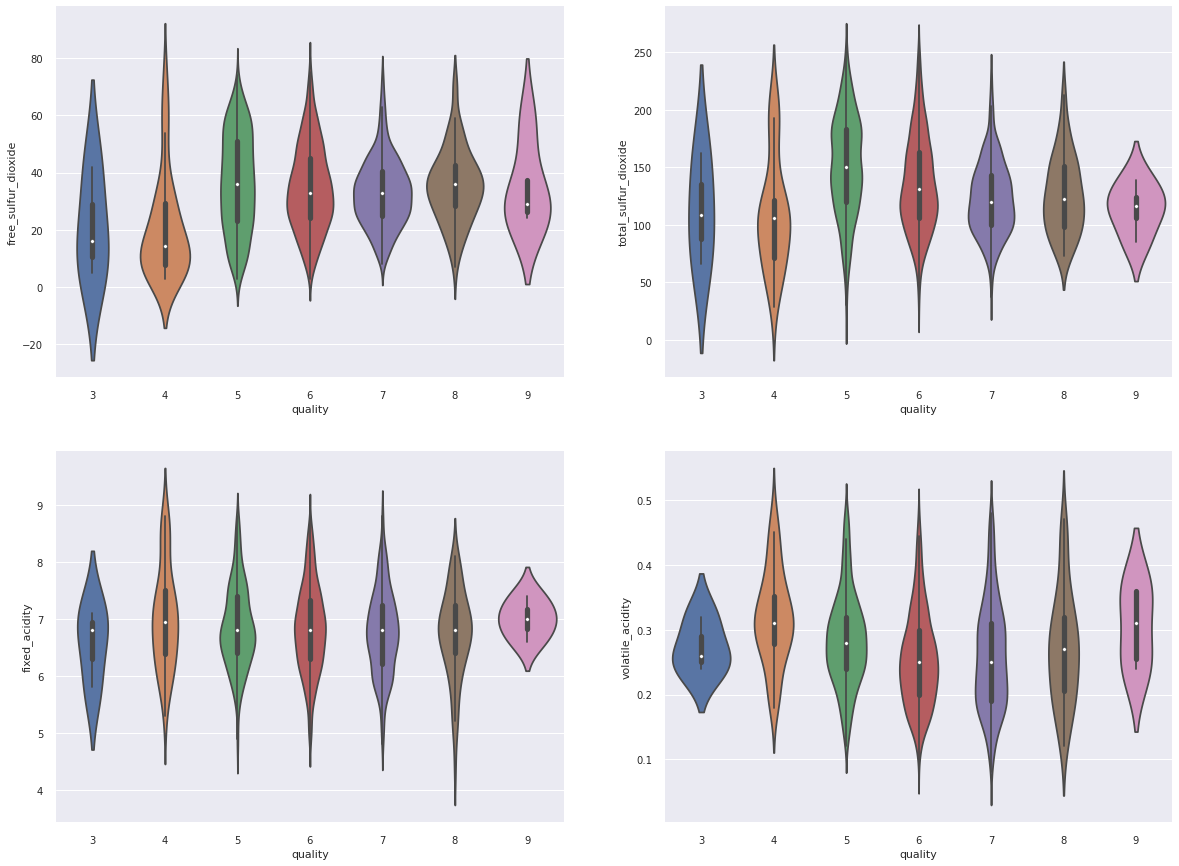

In [22]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.violinplot(x = 'quality', y = 'free_sulfur_dioxide', data = dataset)
plt.subplot(2,2,2)
sns.violinplot(x = 'quality', y = 'total_sulfur_dioxide', data = dataset)
plt.subplot(2,2,3)
sns.violinplot(x = 'quality', y = 'fixed_acidity', data = dataset)
plt.subplot(2,2,4)
sns.violinplot(x = 'quality', y = 'volatile_acidity', data = dataset)

# Data Preprocessing

Normalizing and train-test split of dataset.

In [23]:
features = ['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
label = ['quality']

X = dataset[features]
y = dataset[label]

In [24]:
X = normalize(X, norm = 'l2')
print(X[:3])

[[6.10605192e-02 2.68666285e-03 2.60524882e-03 9.03695685e-02
  2.93090492e-04 2.03535064e-01 9.68826905e-01 8.11046524e-03
  2.56454181e-02 2.76807687e-03 8.54847269e-02]
 [3.06773196e-02 1.31474227e-03 1.41213058e-03 5.94068728e-02
  2.14254295e-04 2.87295532e-01 9.54405497e-01 4.85880048e-03
  1.52899656e-02 1.94776632e-03 4.28508591e-02]
 [4.03063988e-02 1.72741709e-03 2.93660905e-03 7.83095748e-02
  2.87902848e-04 2.30322279e-01 9.67353571e-01 5.74423763e-03
  1.76772349e-02 2.99418962e-03 5.52773469e-02]]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2037
Total # of sample in train dataset: 1364
Total # of sample in validation dataset: 336
Total # of sample in test dataset: 337


# Scores of Models

In [26]:
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
    'XGBClassifier': XGBClassifier()
}

modelNames = ["GaussianNB","MultinomialNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

GaussianNB
Train score of trained model: 28.95894428152493
Validation score of trained model: 28.57142857142857
Test score of trained model: 21.66172106824926
 
Confussion Matrix: 
[[ 2 11 11  2  2  0]
 [ 0  6 14  0  1  0]
 [ 2 37 28  6  0  0]
 [ 0 43 90 36  9  1]
 [ 0  6 16 13  1  0]
 [ 0  0  0  0  0  0]]

Accuracy : 0.42105263157894735
Precision: 0.35294117647058826
Recall   : 1.0
F1 score : 0.5217391304347826
Specificity : 0.15384615384615385

Classification Report: 
              precision    recall  f1-score   support

           4       0.50      0.07      0.12        28
           5       0.06      0.29      0.10        21
           6       0.18      0.38      0.24        73
           7       0.63      0.20      0.31       179
           8       0.08      0.03      0.04        36
           9       0.00      0.00      0.00         0

    accuracy                           0.22       337
   macro avg       0.24      0.16      0.13       337
weighted avg       0.43      0.22    

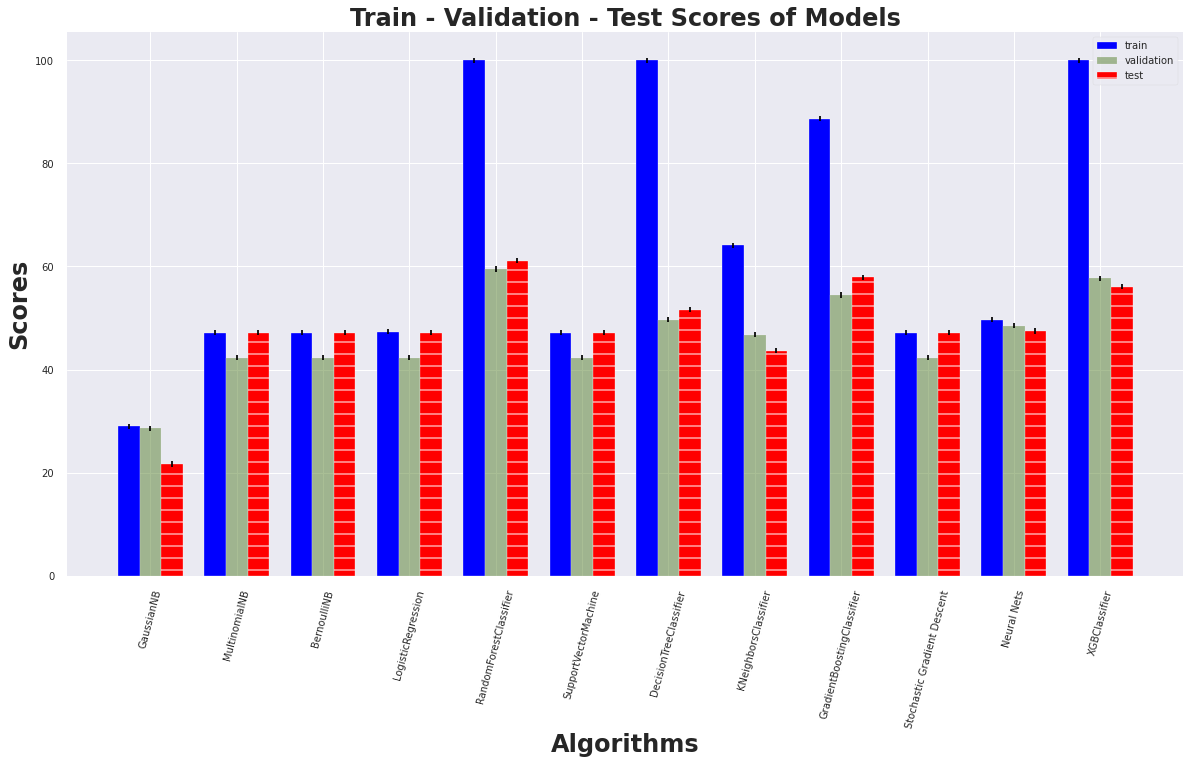

In [27]:
plt.figure(figsize=(20,10))
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB","MultinomialNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [28]:
for i in range(12):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 21.66172106824926
Accuracy of MultinomialNB -----> 47.18100890207715
Accuracy of BernoulliNB -----> 47.18100890207715
Accuracy of LogisticRegression -----> 47.18100890207715
Accuracy of RandomForestClassifier -----> 61.12759643916914
Accuracy of SupportVectorMachine -----> 47.18100890207715
Accuracy of DecisionTreeClassifier -----> 51.632047477744806
Accuracy of KNeighborsClassifier -----> 43.62017804154303
Accuracy of GradientBoostingClassifier -----> 57.86350148367953
Accuracy of Stochastic Gradient Descent -----> 47.18100890207715
Accuracy of Neural Nets -----> 47.47774480712167
Accuracy of XGBClassifier -----> 56.083086053412465


Train-validation-test results, confusion matrixes and classification reports on the above. When we evaluate results, we can see that the most succesful algorithm is RandomForestClassifier with 62.01 accuracy score. We had 7 labels to predict. Now, i will decrease this 7 labels to 3 and try to increase accuracy scores.

# Improving Results

Dataset includes 'quality' attribute. This atribute values are between 0 and 9. For increase the accuracy of results, I have done decrease the value interval. So I created an attribute. According to these attribute, if 'quality' value of sample is lower than 5, it will be classified as 'low', if 6 or 7 it will be in 'medium' range and the others will be 'high' quality wines. For use this new data in machine learning algorithms, I made this values integers. 'low' quality is 0, 'medium' quality is 1 and 'high' quality is 2. I not gonna use 'quality_value' attribute in my application. I did it to see how did I obtain that values.

In [29]:
dataset['quality'].value_counts()

6    944
5    589
7    391
8     66
4     40
9      4
3      3
Name: quality, dtype: int64

In [30]:
dataset["quality_value"] = dataset.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')

In [31]:
dataset = dataset.sample(frac=1, random_state=101).reset_index(drop=True)

In [32]:
dataset["quality_interval"] = dataset.quality.apply(lambda r: 0 if r <= 5 else 1 if r <= 7 else 2)

In [33]:
dataset = dataset.sample(frac=1, random_state=101).reset_index(drop=True)

Checking the new dataset..

In [34]:
dataset.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            6.8              0.27         0.29             4.6      0.046   
1            7.4              0.29         0.50             1.8      0.042   
2            6.7              0.25         0.23             7.2      0.038   
3            5.8              0.26         0.24             9.2      0.044   
4            6.1              0.30         0.47             1.4      0.049   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                  6.0                  88.0  0.99458  3.34       0.48   
1                 35.0                 127.0  0.99370  3.45       0.50   
2                 61.0                 220.0  0.99520  3.14       0.35   
3                 55.0                 152.0  0.99610  3.31       0.38   
4                 50.0                 187.0  0.99270  3.19       0.45   

   alcohol  quality quality_value  quality_interval  
0     10.6        4           low                 0  
1     10.2        7        medium                 1  
2      9.5        5           low                 0  
3      9.4        5           low                 0  
4      9.5        5           low                 0

In [35]:
dataset.isnull().sum().sum()

0

In [36]:
features = ['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
label = ['quality_interval']

X = dataset[features]
y = dataset[label]

In [37]:
X = normalize(X, norm = 'l2')
print(X[:3])

[[7.61583018e-02 3.02393257e-03 3.24792758e-03 5.15188512e-02
  5.15188512e-04 6.71985016e-02 9.85578023e-01 1.11390476e-02
  3.74071659e-02 5.37588013e-03 1.18717353e-01]
 [5.58916280e-02 2.19034758e-03 3.77646135e-03 1.35952609e-02
  3.17222753e-04 2.64352294e-01 9.59221183e-01 7.50533929e-03
  2.60575833e-02 3.77646135e-03 7.70398115e-02]
 [2.92917148e-02 1.09297443e-03 1.00553648e-03 3.14776637e-02
  1.66132114e-04 2.66685762e-01 9.61817502e-01 4.35091263e-03
  1.37277589e-02 1.53016421e-03 4.15330285e-02]]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2037
Total # of sample in train dataset: 1364
Total # of sample in validation dataset: 336
Total # of sample in test dataset: 337


In [39]:
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
    'XGBClassifier': XGBClassifier()
}

modelNames = ["GaussianNB","MultinomialNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']

trainScores_2 = []
validationScores_2 = []
testScores_2 = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores_2.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores_2.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores_2.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

GaussianNB
Train score of trained model: 56.451612903225815
Validation score of trained model: 53.86904761904761
Test score of trained model: 54.00593471810089
 
Confussion Matrix: 
[[  8  10   0]
 [ 89 170  11]
 [  3  42   4]]

Accuracy : 0.6425992779783394
Precision: 0.9444444444444444
Recall   : 0.6563706563706564
F1 score : 0.7744874715261959
Specificity : 0.4444444444444444

Classification Report: 
              precision    recall  f1-score   support

           0       0.08      0.44      0.14        18
           1       0.77      0.63      0.69       270
           2       0.27      0.08      0.12        49

    accuracy                           0.54       337
   macro avg       0.37      0.39      0.32       337
weighted avg       0.66      0.54      0.58       337



############################################################################



MultinomialNB
Train score of trained model: 66.49560117302052
Validation score of trained model: 61.30952380952381
Test score of t

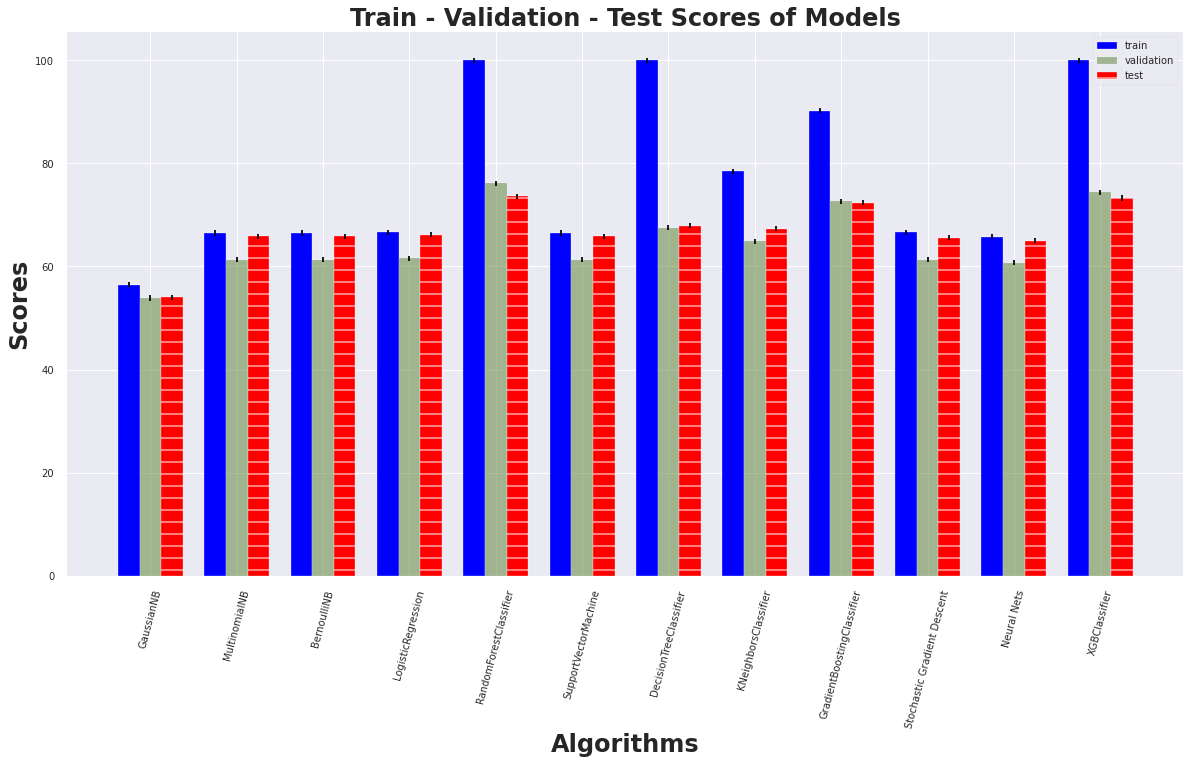

In [40]:
plt.figure(figsize=(20,10))
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores_2
bars2 = validationScores_2
bars3 = testScores_2
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB", 'MultinomialNB', 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [41]:
for i in range(11):
    print(f'Accuracy of {modelNames[i]} -----> {testScores_2[i]}')

Accuracy of GaussianNB -----> 54.00593471810089
Accuracy of MultinomialNB -----> 65.8753709198813
Accuracy of BernoulliNB -----> 65.8753709198813
Accuracy of LogisticRegression -----> 66.17210682492582
Accuracy of RandomForestClassifier -----> 73.59050445103857
Accuracy of SupportVectorMachine -----> 65.8753709198813
Accuracy of DecisionTreeClassifier -----> 67.95252225519289
Accuracy of KNeighborsClassifier -----> 67.35905044510386
Accuracy of GradientBoostingClassifier -----> 72.40356083086054
Accuracy of Stochastic Gradient Descent -----> 65.57863501483679
Accuracy of Neural Nets -----> 64.98516320474778


When we decrease 7 labels to 3 labels, we can see that the most succesful algorithm is RandomForestClassifier with 74.18 accuracy score. Previous one was 62.01 and some algorithms accuracies increased a little and some of thems decreased.

# Conclusion

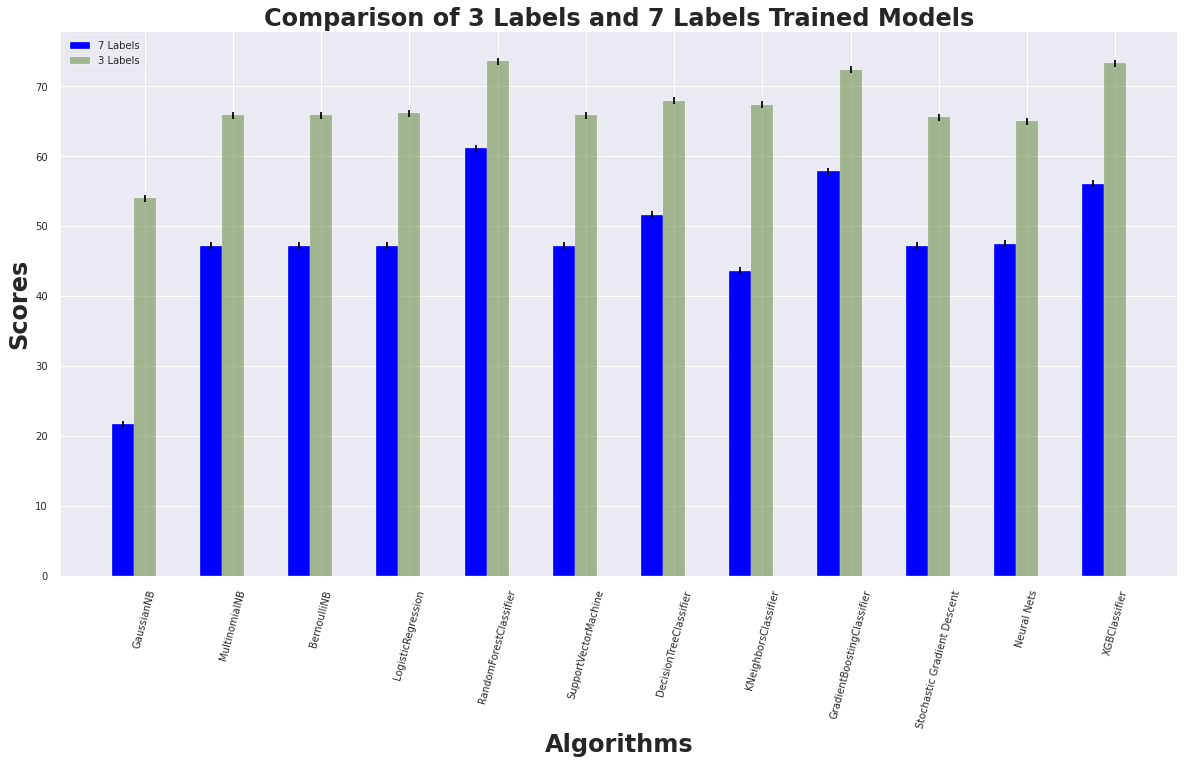

In [42]:
plt.figure(figsize=(20,10))
plt.title('Comparison of 3 Labels and 7 Labels Trained Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = testScores
bars2 = testScores_2
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='7 Labels', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='3 Labels', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
 
modelNames = ["GaussianNB", 'MultinomialNB', 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In conclusion, RandomForestClassifier is most succesful algoritm for 7 and 3 labels. 

If you have seen missing or errors in my work, please let me know via comment or message.